## How to download:

In [1]:
! pip install git+https://github.com/IanAguiar-ai/Discrete_Functions_Action_Integration_Hub

  Cloning https://github.com/IanAguiar-ai/Discrete_Functions_Action_Integration_Hub to /tmp/pip-req-build-5sydybce
  Running command git clone --filter=blob:none --quiet https://github.com/IanAguiar-ai/Discrete_Functions_Action_Integration_Hub /tmp/pip-req-build-5sydybce
  Resolved https://github.com/IanAguiar-ai/Discrete_Functions_Action_Integration_Hub to commit 7ef48415eb024e438cdb4d2ab37e2c6322a33c1e
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 714.8/714.8 kB 5.7 MB/s eta 0:00:00
  Created wheel for discrete-function: filename=discrete_function-1.3.0-py3-none-any.whl size=10799 sha256=3e5c9f8310f3ea35aa4c315cd5943f01d507596e415efc3c59fabad2f54be875
  Stored in directory: /tmp/pip-ephem-wheel-cache-kytbiszu/wheels/db/78/55/71fd9c2bd72e58593e2958cba1fd8b47d1ca8f89346e2607be
Successfully built discrete-function


## Importing library:

In [2]:
from discrete_function import *

# Functionalities:

## Creating a discrete function:

$poisson(X = x) = \frac{\lambda^x * e^{-\lambda}}{x!}$

In [3]:
def poisson(x:int, lambda_:float):
  def fatorial(n_):
    n = 1
    for i in range(2, n_ + 1):
      n *= i
    return n

  return (lambda_**x * 2.718281 ** (-lambda_))/fatorial(x)

## Passing the function to the class:

In [4]:
model = discrete_function(poisson, lambda_ = 3)

In [5]:
print(model)

Function: poisson
All args: () {'lambda_': 3}


## Getting function values:

In [6]:
print(model[0:10])

[0.0497871138891618, 0.1493613416674854, 0.2240420125012281, 0.2240420125012281, 0.16803150937592107, 0.10081890562555265, 0.05040945281277632, 0.021604051205475566, 0.008101519202053337, 0.0027005064006844458, 0.0008101519202053338]


Note that the values were obtained where x goes from 0 to 10 including 10.

## Getting the accumulated values:

In [7]:
print(model.accumulated(0, 10))

[0.9997085771017721]


## Randomly taking samples according to this probability function.

In [8]:
print(model.random(20))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Conditional Probability:

In [9]:
print(model[1:2] | model[1:4])

[0.4878048780487805]


In [10]:
print(model[2,4,6] | model[0:6])

[0.4578235672891178]


## Fitting curve parameter according to data:

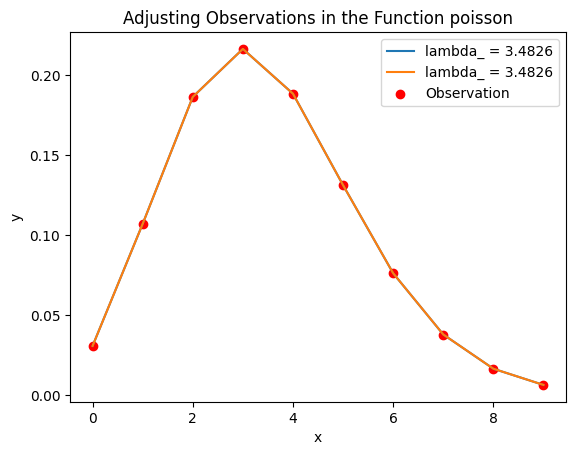

In [11]:
sample = [poisson(i, lambda_ = 3.48261) for i in range(10)]
parameter = model.adjust_to_curve(name_param ='lambda_',
                                  curve = sample,
                                  initial_value = 1,
                                  plot = True,
                                  times = 1)

In [12]:
print(parameter)

(3.48261, 3.48261)


### Example with more than one parameter:

In [13]:
def double_poisson(x:int, lambda_1:float, lambda_2:float, p):
  return poisson(x, lambda_1) * p + poisson(x, lambda_2) * (1 - p)

---------------0---------------
Finding parameters for the lambda_1:


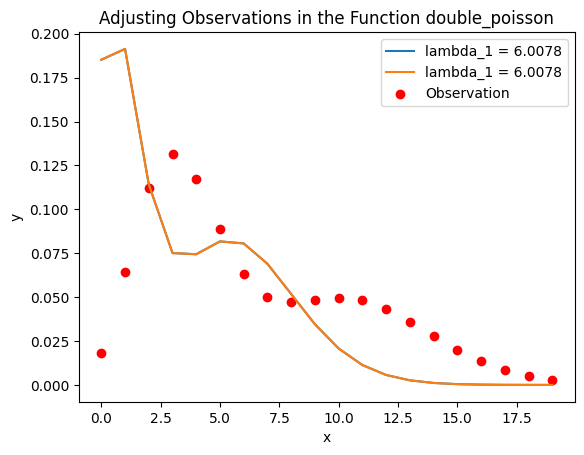

Lower Limit = 6.0078125
Upper Limit = 6.0078127374872565

Finding parameters for the lambda_2:


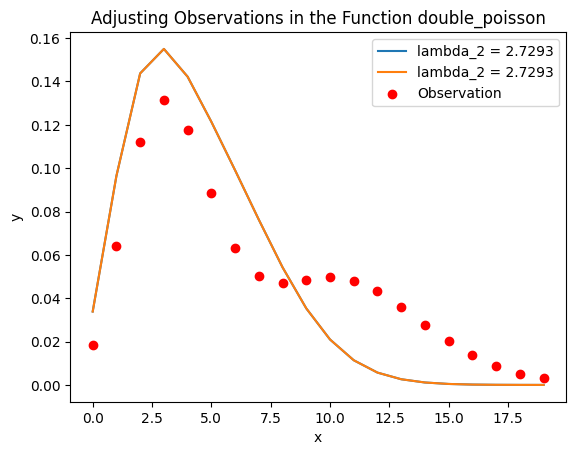

Lower Limit = 2.729341497644782
Upper Limit = 2.729345311410725

Finding parameters for the p:


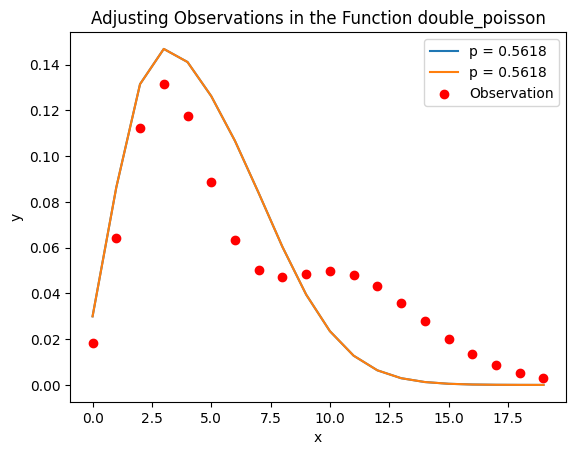

Lower Limit = 0.5618101861327887
Upper Limit = 0.5618120925500989

---------------1---------------
Finding parameters for the lambda_1:


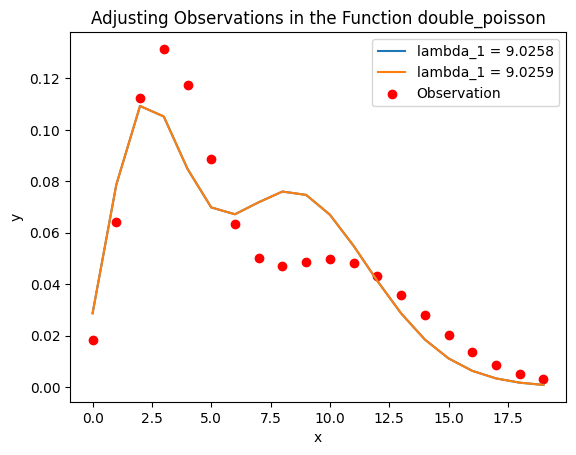

Lower Limit = 9.025808195583522
Upper Limit = 9.0259302649647

Finding parameters for the lambda_2:


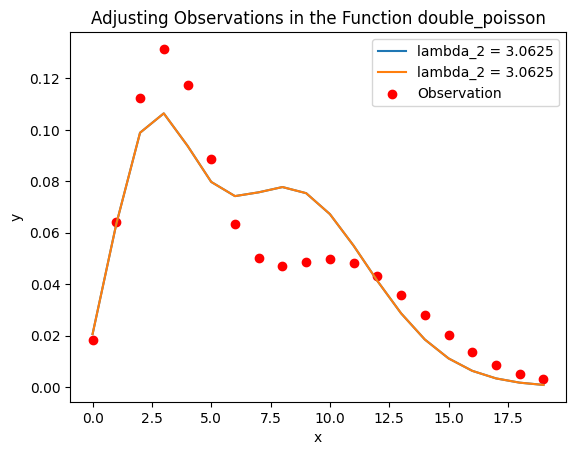

Lower Limit = 3.0625
Upper Limit = 3.062500028871

Finding parameters for the p:


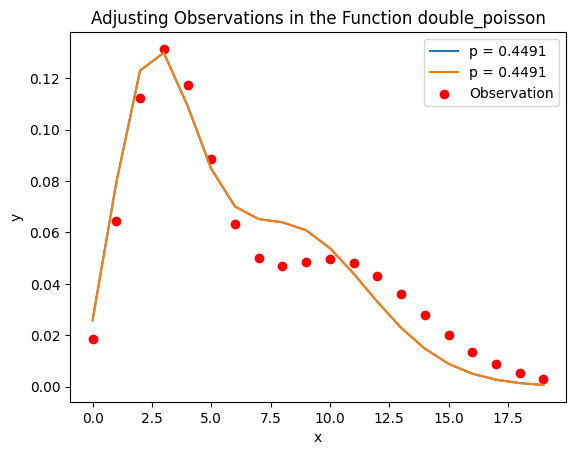

Lower Limit = 0.449105940759182
Upper Limit = 0.4491068935021758

---------------2---------------
Finding parameters for the lambda_1:


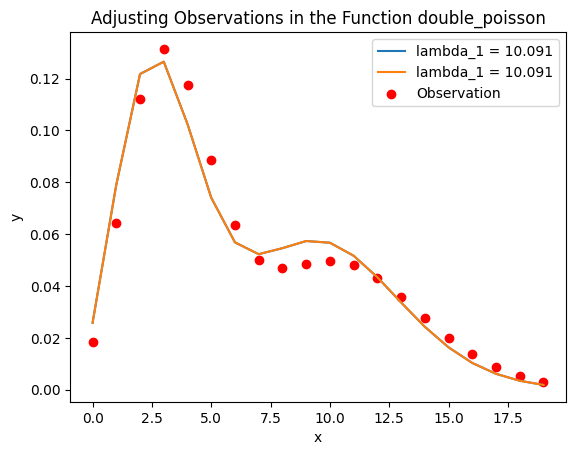

Lower Limit = 10.09153495542705
Upper Limit = 10.091779095120728

Finding parameters for the lambda_2:


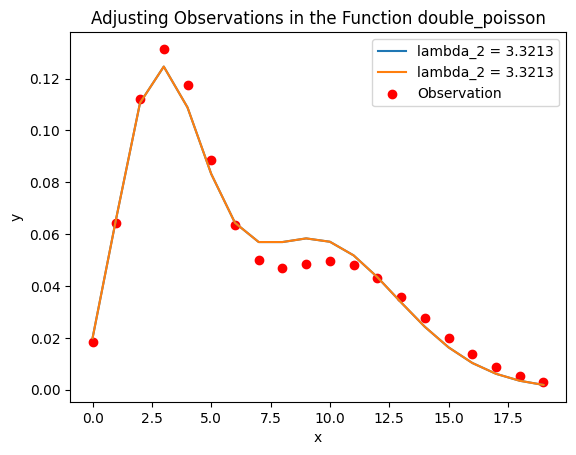

Lower Limit = 3.3213718831539154
Upper Limit = 3.3213737895712256

Finding parameters for the p:


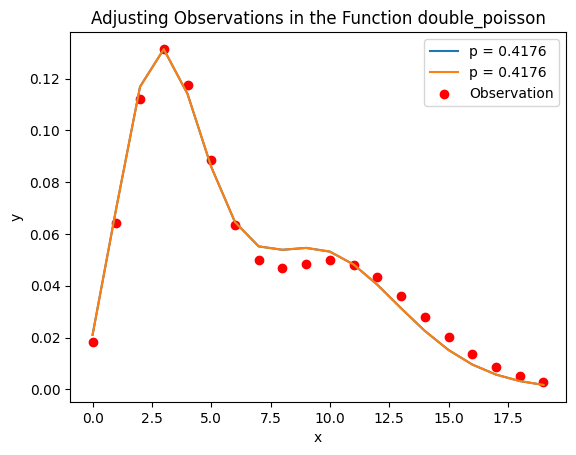

Lower Limit = 0.41763482615351677
Upper Limit = 0.417636732570827

---------------3---------------
Finding parameters for the lambda_1:


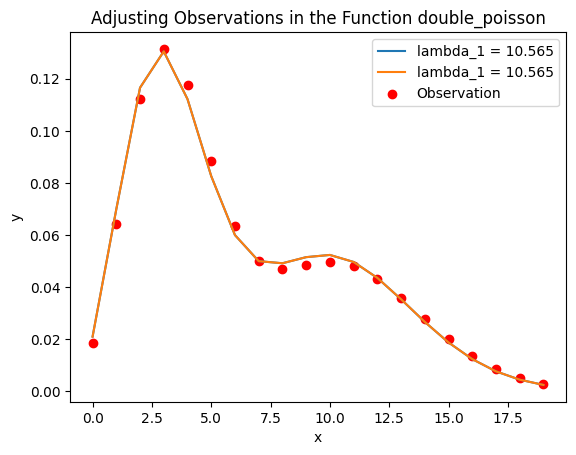

Lower Limit = 10.565177788957953
Upper Limit = 10.56529985833913

Finding parameters for the lambda_2:


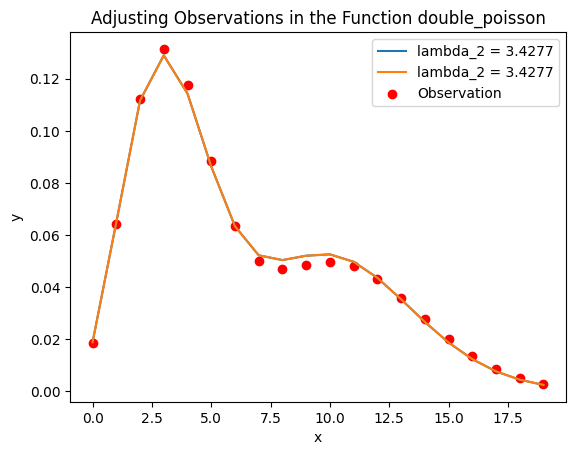

Lower Limit = 3.427734375
Upper Limit = 3.427734493277967

Finding parameters for the p:


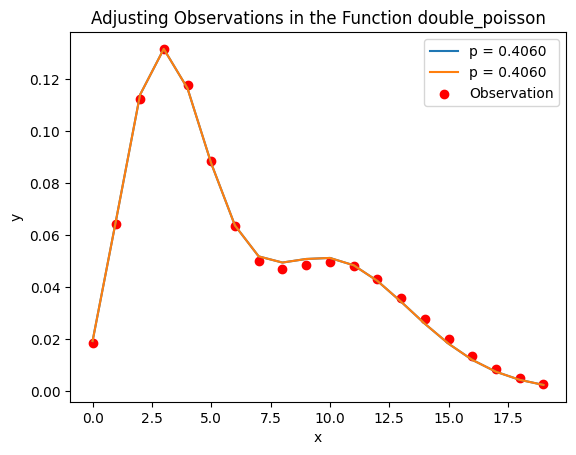

Lower Limit = 0.4060024581849575
Upper Limit = 0.40600269567221403

---------------4---------------
Finding parameters for the lambda_1:


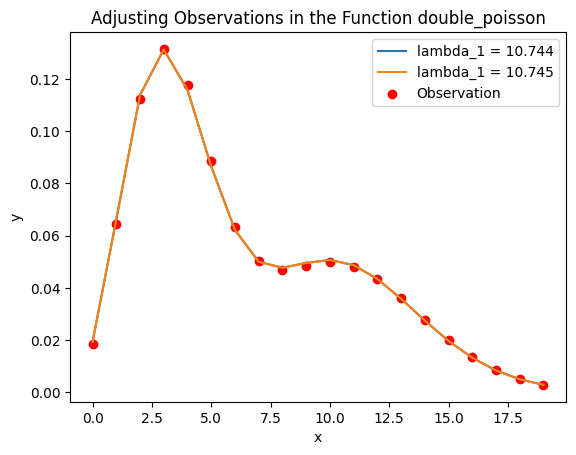

Lower Limit = 10.744974783621728
Upper Limit = 10.745951345190406

Finding parameters for the lambda_2:


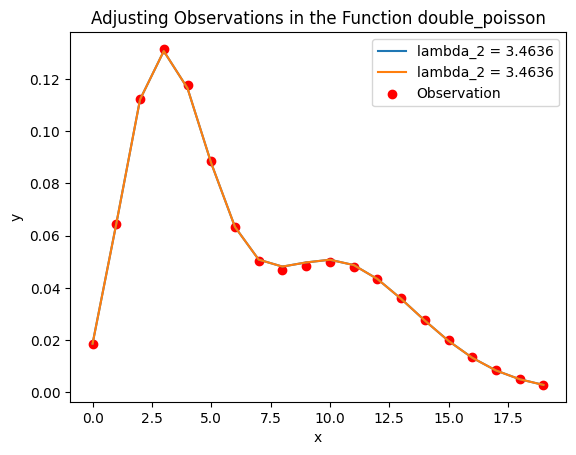

Lower Limit = 3.463689735159278
Upper Limit = 3.4636973636224866

Finding parameters for the p:


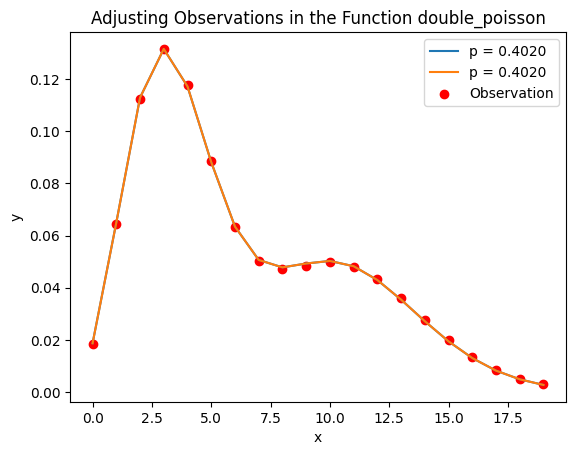

Lower Limit = 0.4020325504243374
Upper Limit = 0.4020344568416476

---------------5---------------
Finding parameters for the lambda_1:


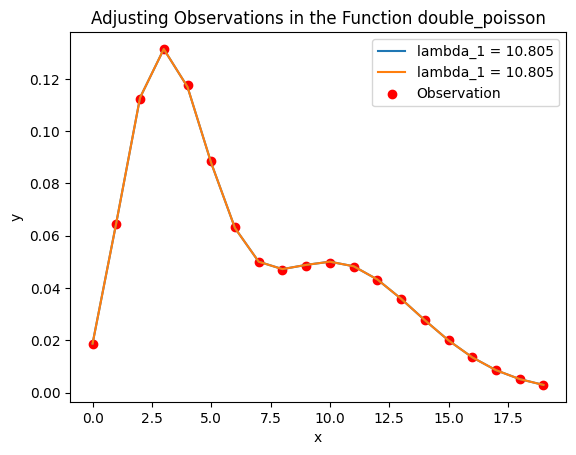

Lower Limit = 10.805020689964294
Upper Limit = 10.805142759345472

Finding parameters for the lambda_2:


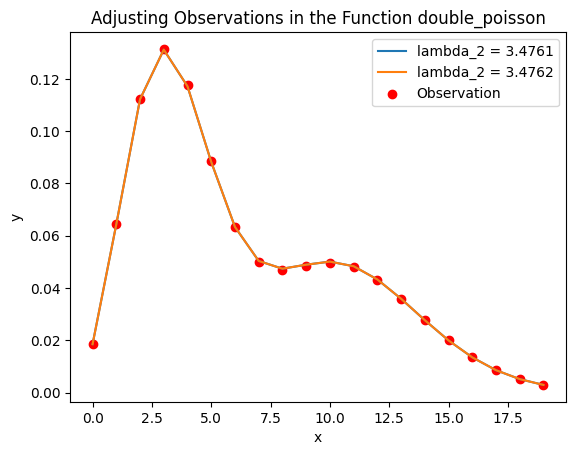

Lower Limit = 3.4761937484145164
Upper Limit = 3.4762090062722564

Finding parameters for the p:


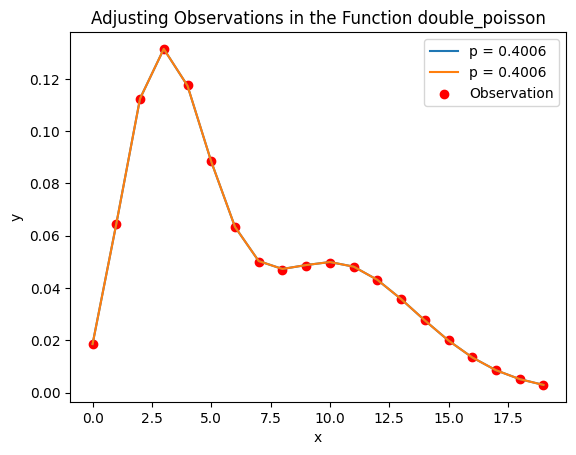

Lower Limit = 0.4006905388087034
Upper Limit = 0.40069149155169725

Recommended value for initial_value = 0.8
Recommended value for max_iterations = 36


In [14]:
from random import random, seed
seed(1)

model_2 = discrete_function(double_poisson, lambda_1 = 1, lambda_2 = 1, p = 0.5)

sample = [double_poisson(i, lambda_1 = 3.48261, lambda_2 = 10.8362, p = 0.6) for i in range(20)]
parameter = model_2.adjust_to_curve(name_param = ['lambda_1', 'lambda_2', 'p'],
                                  curve = sample,
                                  initial_value = 1,
                                  plot = True,
                                  times = 6,
                                  max_iterations = 30)

Note that by increasing the number of iterations and 'times', convergence and therefore accuracy will be greater.

### An example with noise:

---------------0---------------
Finding parameters for the lambda_1:


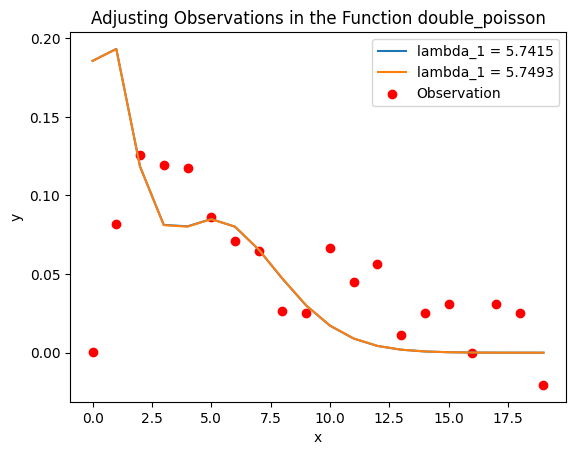

Lower Limit = 5.741541862487793
Upper Limit = 5.749353408813477

Finding parameters for the lambda_2:


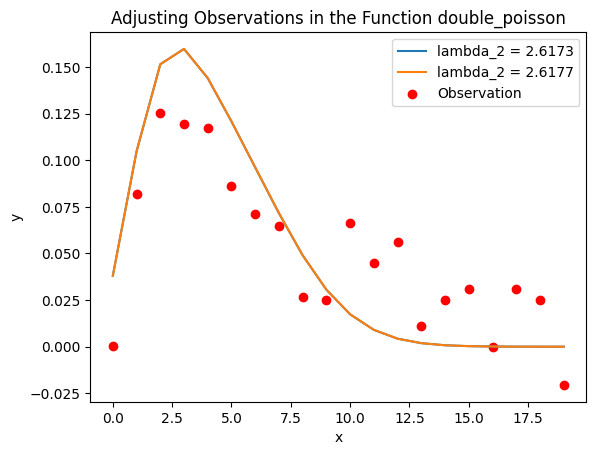

Lower Limit = 2.617304801940918
Upper Limit = 2.6177921295166016

Finding parameters for the p:


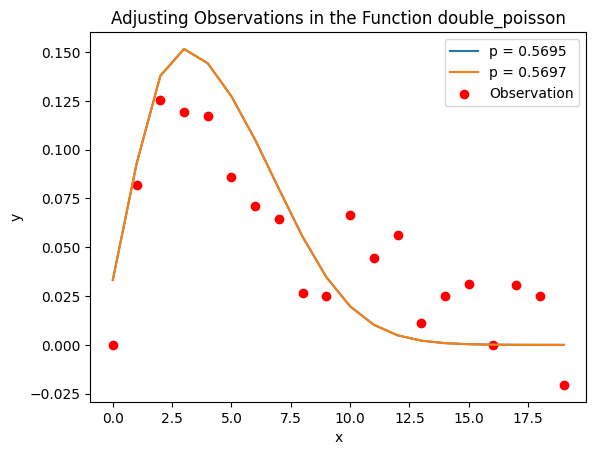

Lower Limit = 0.5695400238037109
Upper Limit = 0.5697832107543945

---------------1---------------
Finding parameters for the lambda_1:


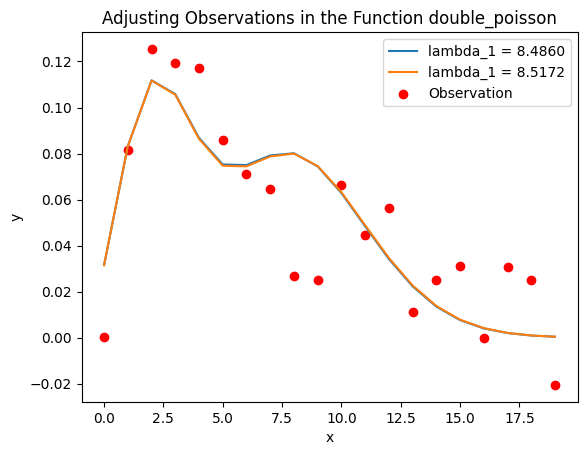

Lower Limit = 8.486002922058105
Upper Limit = 8.517251968383789

Finding parameters for the lambda_2:


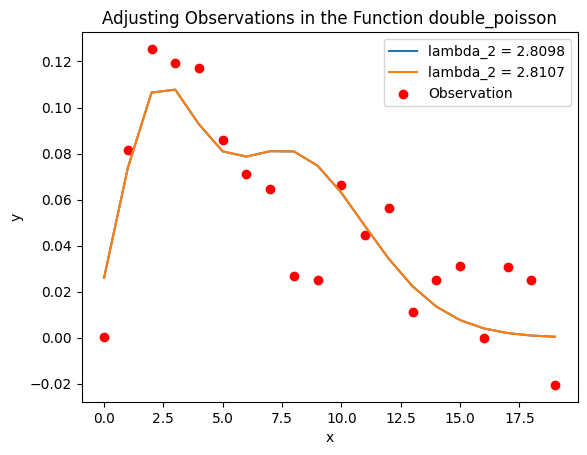

Lower Limit = 2.8098058700561523
Upper Limit = 2.810781478881836

Finding parameters for the p:


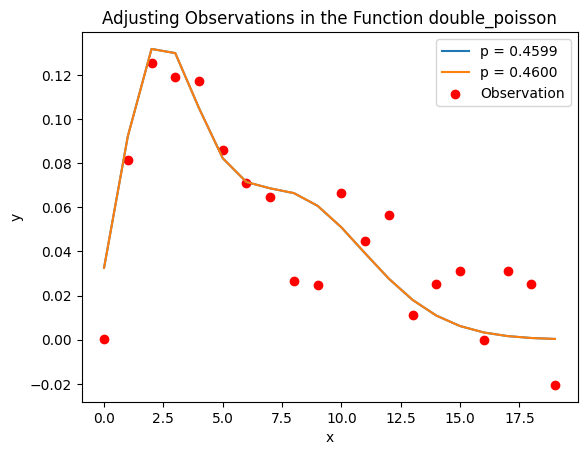

Lower Limit = 0.45992279052734375
Upper Limit = 0.46004390716552734

---------------2---------------
Finding parameters for the lambda_1:


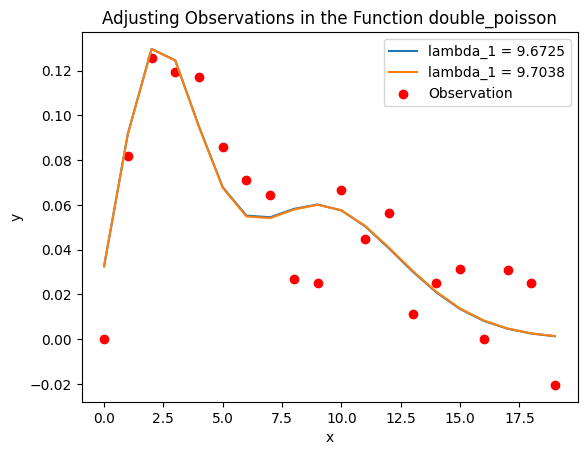

Lower Limit = 9.672572135925293
Upper Limit = 9.703821182250977

Finding parameters for the lambda_2:


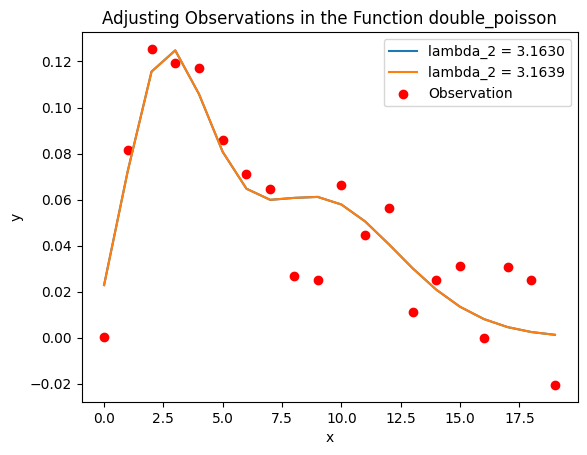

Lower Limit = 3.163020133972168
Upper Limit = 3.1639957427978516

Finding parameters for the p:


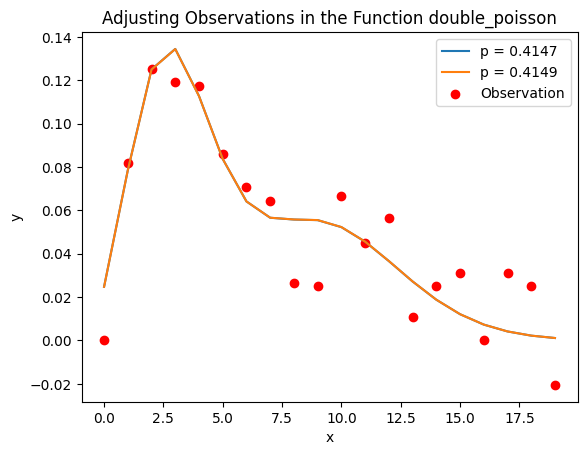

Lower Limit = 0.41475486755371094
Upper Limit = 0.41499805450439453

---------------3---------------
Finding parameters for the lambda_1:


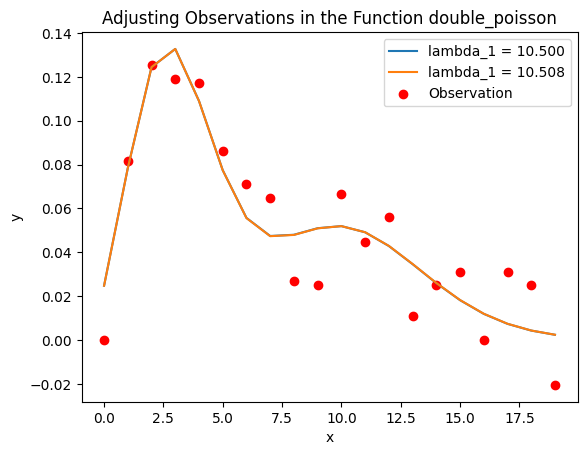

Lower Limit = 10.5003662109375
Upper Limit = 10.508177757263184

Finding parameters for the lambda_2:


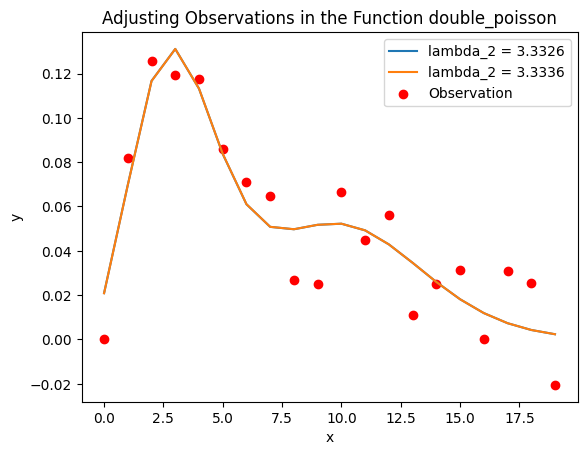

Lower Limit = 3.3326854705810547
Upper Limit = 3.3336610794067383

Finding parameters for the p:


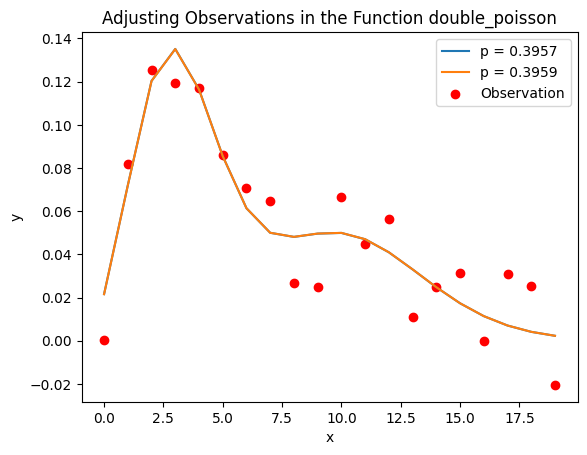

Lower Limit = 0.3957176208496094
Upper Limit = 0.39596080780029297

---------------4---------------
Finding parameters for the lambda_1:


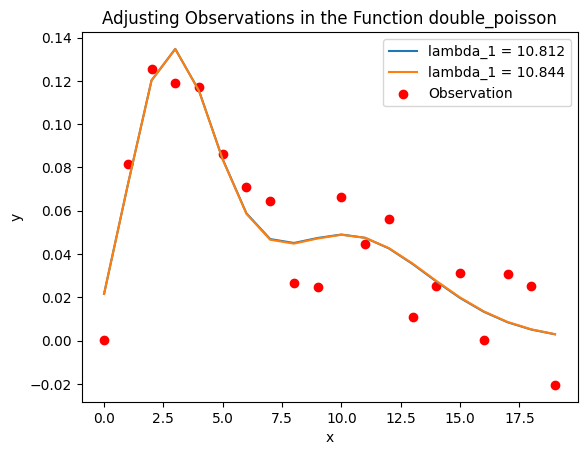

Lower Limit = 10.81283187866211
Upper Limit = 10.844080924987793

Finding parameters for the lambda_2:


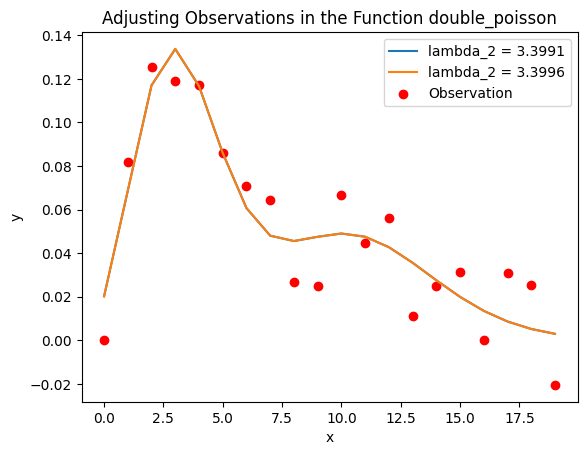

Lower Limit = 3.3991622924804688
Upper Limit = 3.3996496200561523

Finding parameters for the p:


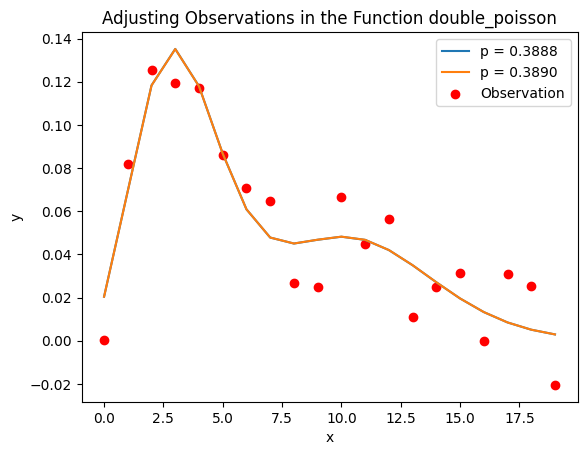

Lower Limit = 0.3888378143310547
Upper Limit = 0.3890810012817383

---------------5---------------
Finding parameters for the lambda_1:


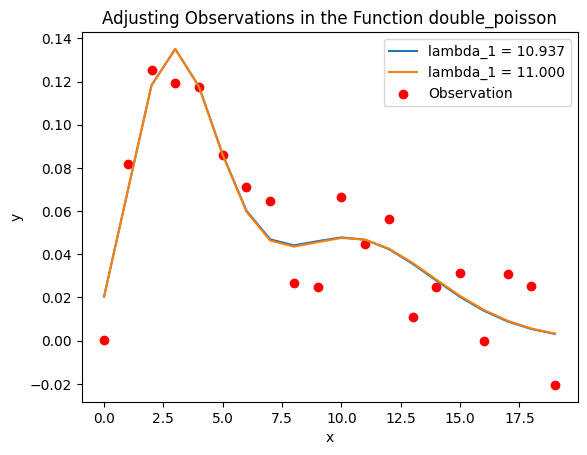

Lower Limit = 10.937826156616211
Upper Limit = 11.000325202941895

Finding parameters for the lambda_2:


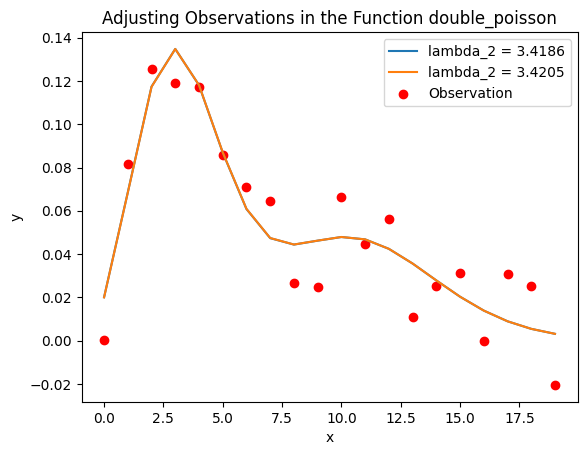

Lower Limit = 3.418630599975586
Upper Limit = 3.4205827713012695

Finding parameters for the p:


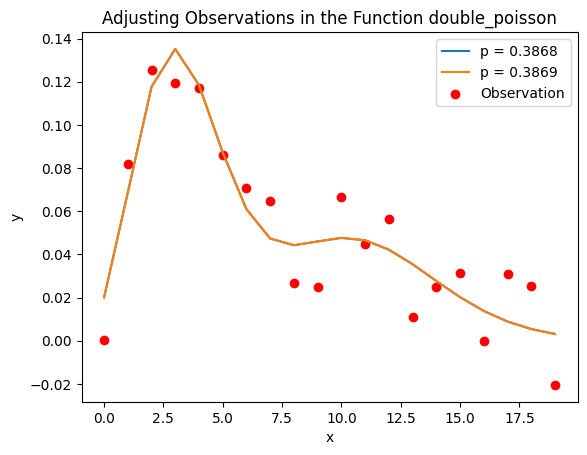

Lower Limit = 0.3868083953857422
Upper Limit = 0.3869295120239258

Recommended value for initial_value = 0.77
Recommended value for max_iterations = 38


In [15]:
seed(1)

model_2 = discrete_function(double_poisson, lambda_1 = 1, lambda_2 = 1, p = 0.5)

sample = [double_poisson(i, lambda_1 = 3.48261, lambda_2 = 10.8362, p = 0.6) + random() * 0.05 - 0.025 for i in range(20)]
parameter = model_2.adjust_to_curve(name_param = ['lambda_1', 'lambda_2', 'p'],
                                  curve = sample,
                                  initial_value = 1,
                                  plot = True,
                                  times = 6,
                                  max_iterations = 20)

### You can still order the chart individually:

Way 1:

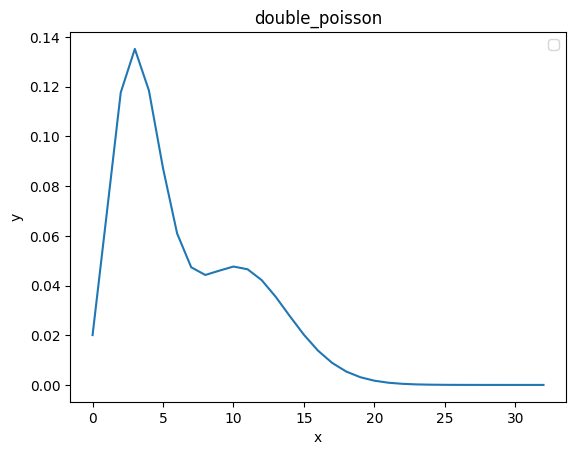

In [16]:
model_2.plot()

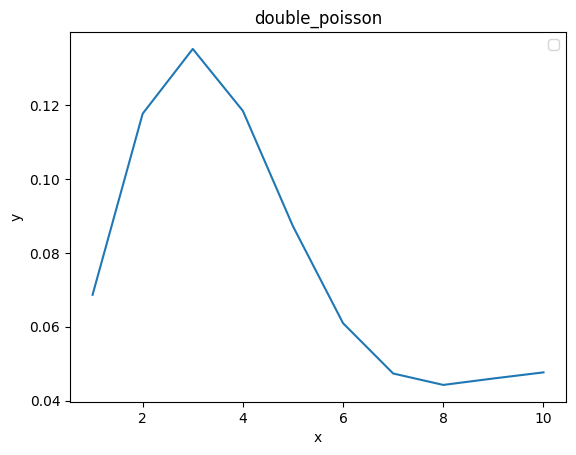

In [17]:
model_2.plot([1,10])

Way 2:

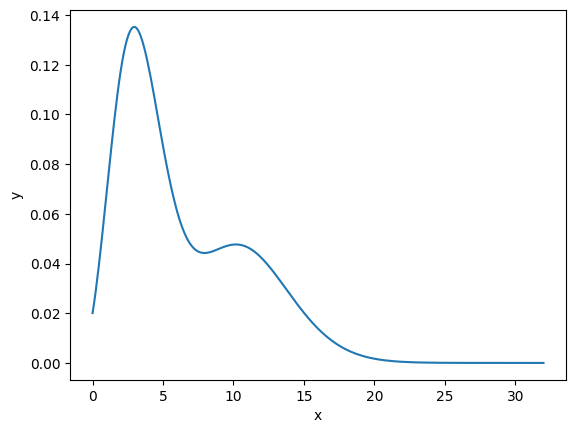

In [18]:
model_2[:32].plot()

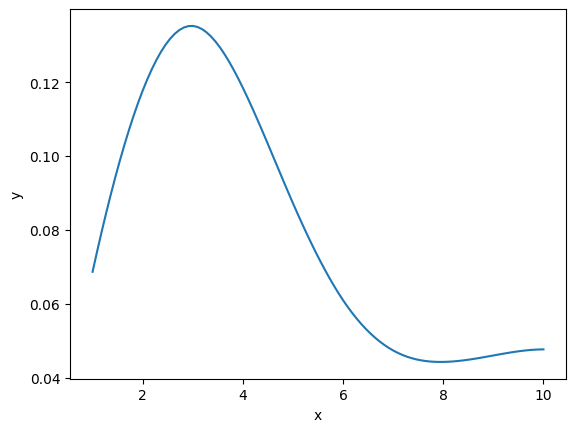

In [19]:
model_2[1:10].plot()

Notice that when I plot the second way the curves are smoothed.

## Testing which model best fits the data:

Functions:

In [20]:
from math import gamma

def fat(n:int):
    try:
        return gamma(n + 1)
    except:
        return 0

def poisson(x:int, lambda_:float):
    return 2.71828182**(-lambda_) * (lambda_**x)/fat(x)

def normal(x:int, mi:float, sigma:float):
    try:
        return (2.7182**(-(1/2)*((x - mi)/sigma)**2)) / (sigma * (2*3.1415)**(1/2))
    except:
        return 0

models:

In [21]:
from discrete_function import adjust_sample_on

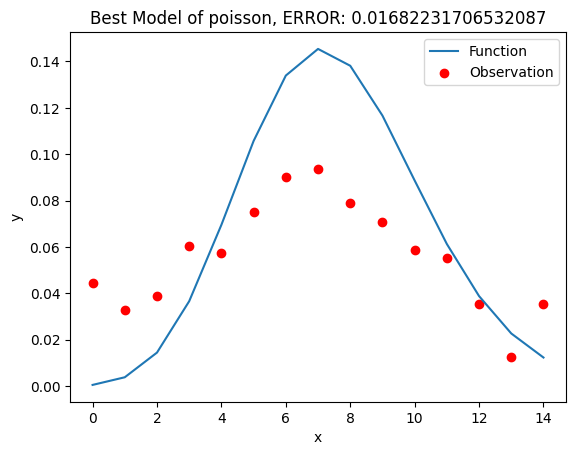

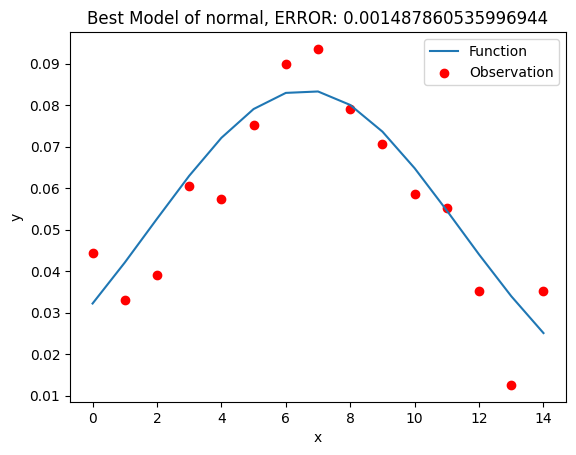

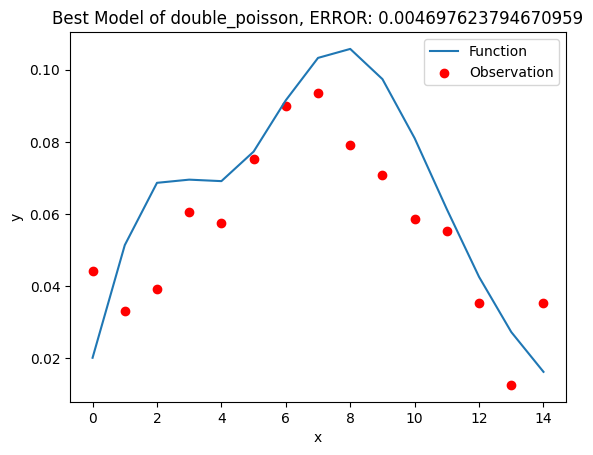

Best Model:
Function: normal
All args: () {'sigma': 4.773368835449219, 'mi': 6.593193054199219}


In [22]:
curve = [normal(i, mi = 6.74, sigma = 4.25) + random() * 0.04 - 0.02 for i in range(0, 15)]

model_1 = discrete_function(poisson, lambda_ = 1)
model_2 = discrete_function(normal, sigma = 1, mi = 1)
model_3 = discrete_function(double_poisson, lambda_1 = 1, lambda_2 = 1, p = 0.5)

best_model = adjust_sample_on(curve, [model_1, model_2, model_3],
                              plot = True)

Notice that he found the function that best fits the data:

Function: normal
All args: () {'sigma': 4.773368835449219, 'mi': 6.593193054199219}


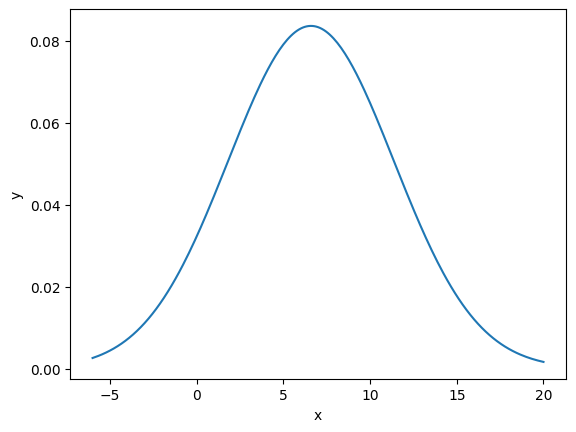

In [23]:
print(best_model)
best_model[-6:20].plot()

### With a non-sequential x:

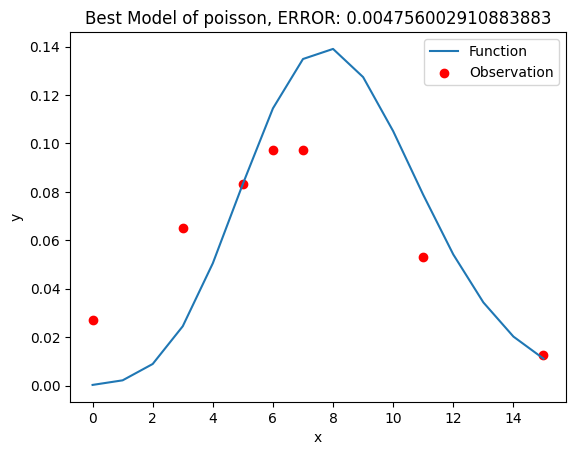

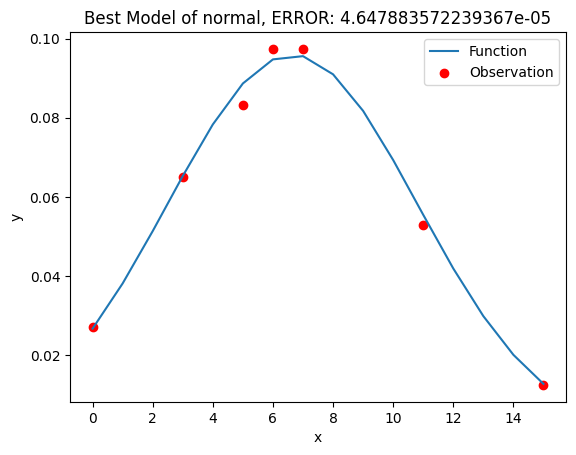

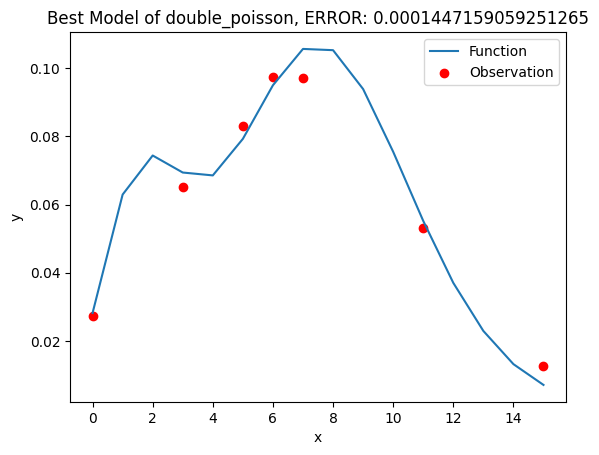

Best Model:
Function: normal
All args: () {'sigma': 4.160026550292969, 'mi': 6.648307800292969}


In [24]:
x = [0, 3, 5, 6, 7, 11, 15]

curve = [normal(i, mi = 6.74, sigma = 4.25) + random() * 0.01 - 0.005 for i in x]

model_1 = discrete_function(poisson, lambda_ = 1)
model_2 = discrete_function(normal, sigma = 1, mi = 1)
model_3 = discrete_function(double_poisson, lambda_1 = 1, lambda_2 = 1, p = 0.5)

best_model = adjust_sample_on(curve = curve,
                              models = [model_1, model_2, model_3],
                              x = x,
                              plot = True)

### Example with sine:

In [25]:
from math import sin, cos

def s2(x, a, b):
    return sin(x*a) + sin(x*b)

def c2(x, a, b):
    return cos(x*a) + cos(x*b)

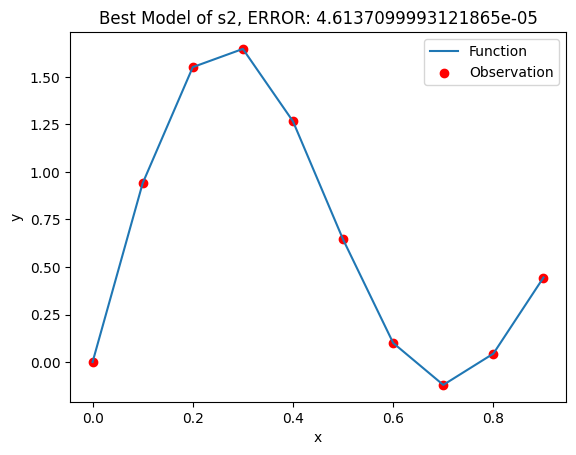

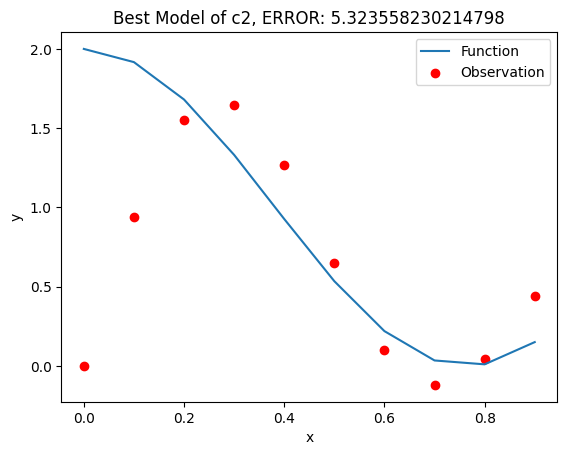

Best Model:
Function: s2
All args: () {'a': 3.00426025390625, 'b': 7.004455566406249}


In [38]:
model_1 = discrete_function(s2, a = 1, b = 1)
model_2 = discrete_function(c2, a = 1, b = 1)

x = [i * 0.1 for i in range(10)]
curve = [s2(i, a = 3, b = 7) for i in x]

best_model = adjust_sample_on(curve = curve, x = x,
                              models = [model_1, model_2],
                              times = 10,
                              initial_value = 0.1,
                              plot = True)

## Function mixes:

In [27]:
def s(x, sa, **args): #sin
    return sin(x*sa)

def c(x, ca, **args): #cos
    return cos(x*ca)

### Mixing:

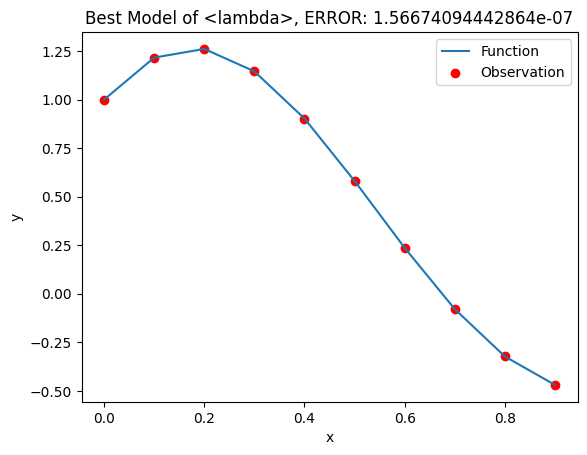

Best Model:
Function: <lambda>
All args: () {'sa': 3.0003753662109376, 'ca': 4.000131225585937}


In [28]:
model_1 = discrete_function(s)
model_2 = discrete_function(c)

final_model = model_1 + model_2

x = [i * 0.1 for i in range(10)]
curve = [s(i, sa = 3) + c(i, ca = 4) for i in x]

best_model = adjust_sample_on(curve = curve, x = x,
                              models = [final_model],
                              times = 20,
                              initial_value = 0.1,
                              plot = True)

### Complex mixtures:

In [29]:
def linear(x, la, lb, **args):
  return la + x*lb

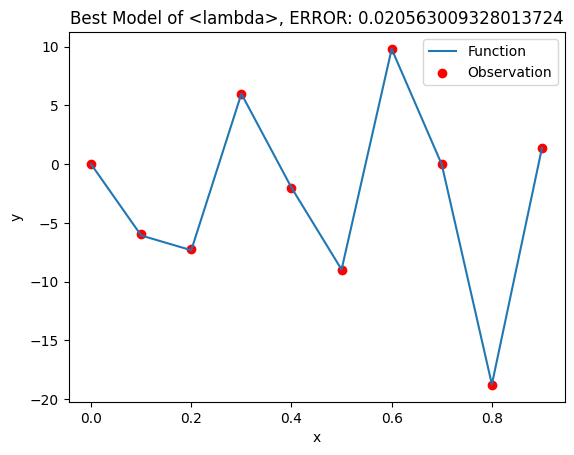

Best Model:
Function: <lambda>
All args: () {'sa': 3.002703857421875, 'ca': 20.002325439453124, 'la': 12.328070068359374, 'lb': 39.42161865234375}


In [30]:
model_1 = discrete_function(s)
model_2 = discrete_function(c)
model_3 = discrete_function(linear)

final_model = (model_1 + model_2 - 1) * (model_3/3)

x = [i * 0.1 for i in range(10)]
curve = [(s(i, sa = 3) + c(i, ca = 20) - 1) * (linear(i, la = 12, lb = 40)/3) for i in x]

best_model = adjust_sample_on(curve = curve, x = x,
                              models = [final_model],
                              times = 15,
                              initial_value = 0.1,
                              plot = True)

## Regression:

Sample and function:

In [31]:
x = [3, 3, 3, 29, 29, 29, 79, 79, 79, 127, 127, 127,
     165, 165, 165, 300, 300, 300, 248, 248, 248,
     200, 200, 200, 317, 317, 317, 156, 156, 156]

y = [37, 37, 37, 58, 58, 58, 57, 58, 57, 67,
     66, 66, 67, 68, 68, 74, 75, 75, 81, 81,
     81, 74, 74, 75, 75, 75, 75, 79, 78, 77]

y = list(map(lambda x: -x, y))

from math import log
def model_regression(x:float, a, b):
    return -a + 20 * log(max(b, 0.001)/max(x, 0.001), 10)

Creating model:

In [32]:
regression = Discrete_function(model_regression)

best = adjust_sample_on(curve = y, x = x,
                        models = [regression],
                        times = 12,
                        initial_value = 0.1,
                        plot = False)

Best Model:
Function: model_regression
All args: () {'a': 61.07177734375001, 'b': 51.2201171875}


Plotting with the samples:

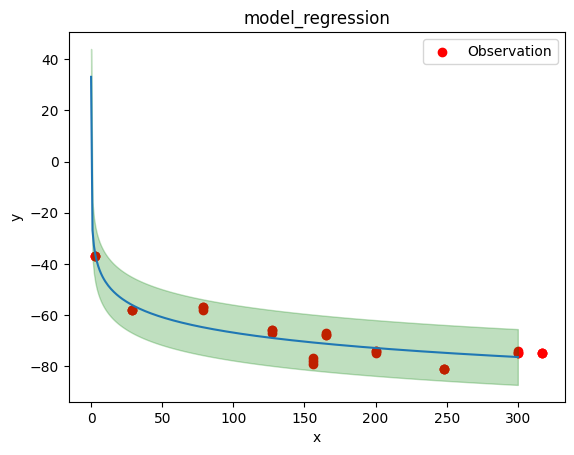

In [33]:
best.plot([0, 300], curve = [x, y])

## Evaluating the function:

In [34]:
def func(x, a, b, c):
  a = b + c
  b = a + c
  c = (b + a) * (b - a)
  b = c/(b+a)
  return b

In [35]:
model = Df(func) #Df is the same as Discrete_function

model.evaluate()

Code in machine:
  2           0 LOAD_FAST                2 (b)
              2 LOAD_FAST                3 (c)
              4 BINARY_ADD
              6 STORE_FAST               1 (a)

  3           8 LOAD_FAST                1 (a)
             10 LOAD_FAST                3 (c)
             12 BINARY_ADD
             14 STORE_FAST               2 (b)

  4          16 LOAD_FAST                2 (b)
             18 LOAD_FAST                1 (a)
             20 BINARY_ADD
             22 LOAD_FAST                2 (b)
             24 LOAD_FAST                1 (a)
             26 BINARY_SUBTRACT
             28 BINARY_MULTIPLY
             30 STORE_FAST               3 (c)

  5          32 LOAD_FAST                3 (c)
             34 LOAD_FAST                2 (b)
             36 LOAD_FAST                1 (a)
             38 BINARY_ADD
             40 BINARY_TRUE_DIVIDE
             42 STORE_FAST               2 (b)

  6          44 LOAD_FAST                2 (b)
             46 RETU

## Change error function:

New error function:

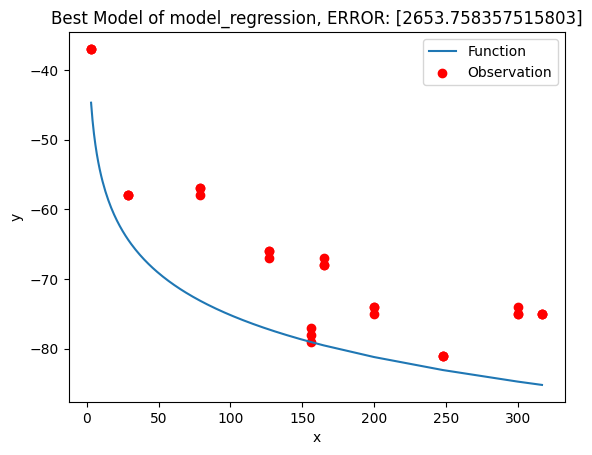

Best Model:
Function: model_regression
All args: () {'a': 0, 'b': 0.017439651489257815}


In [36]:
def error_new(curve_1:list, curve_2:list):
    resp:float = 0
    if len(curve_1) != len(curve_2):
        raise "Different list sizes"
    for a, b in zip(curve_1, curve_2):
        resp:float = (a - b)*(a - b) + resp
        if a > b:
            resp*=2
    return resp

regression = Discrete_function(model_regression)
regression.function_error = error_new

best = adjust_sample_on(curve = y, x = x,
                        models = [regression],
                        times = 6,
                        initial_value = 0.1,
                        plot = True)

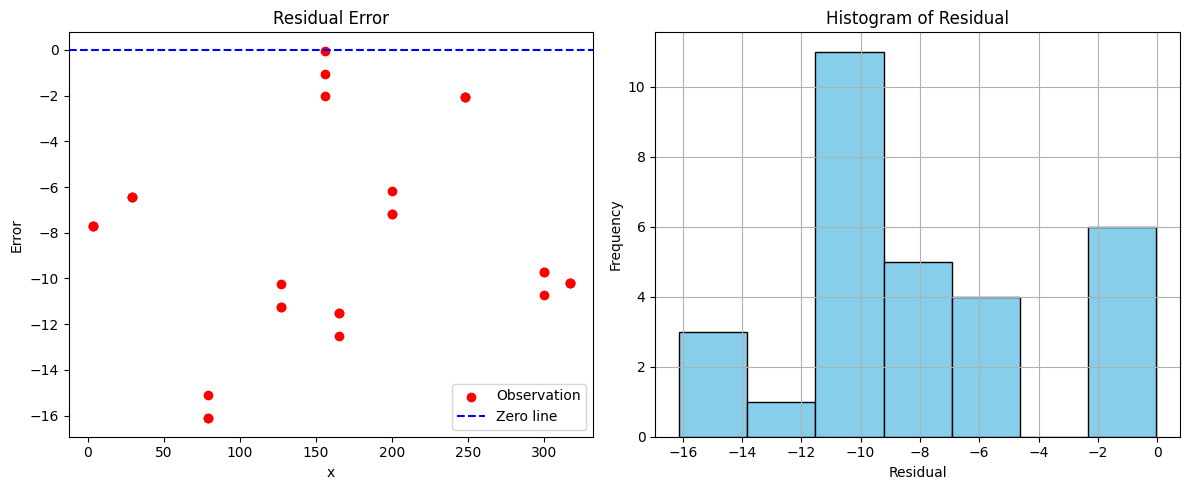

In [37]:
best.residual()